--2025-05-04 15:56:07--  https://raw.githubusercontent.com/ybifoundation/Dataset/main/EmployeeAttrition.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227977 (223K) [text/plain]
Saving to: ‘employee_attrition.csv’

employee_attrition. 100%[===================>] 222.63K  --.-KB/s    in 0.04s   

2025-05-04 15:56:07 (6.09 MB/s) - ‘employee_attrition.csv’ saved [227977/227977]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Dai

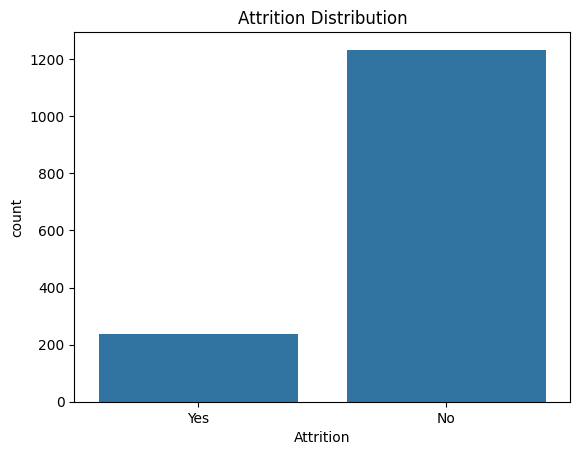


Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294


Confusion Matrix
[[254   1]
 [ 35   4]]

Accuracy: 0.88


In [1]:
# Predicting Employee Attrition - Google Colab Notebook

# =======================
# 1. Import Libraries
# =======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# =======================
# 2. Load Dataset
# =======================
# Download IBM HR Analytics Employee Attrition dataset
!wget -O employee_attrition.csv https://raw.githubusercontent.com/ybifoundation/Dataset/main/EmployeeAttrition.csv

# Load CSV
df = pd.read_csv('employee_attrition.csv')
df.head()

# =======================
# 3. Exploratory Data Analysis
# =======================
print(df.info())
print(df.describe())

sns.countplot(data=df, x='Attrition')
plt.title('Attrition Distribution')
plt.show()

# =======================
# 4. Data Preprocessing
# =======================
# Drop non-informative or high-cardinality columns
cols_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df.drop(columns=cols_to_drop, inplace=True)

# Define features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# =======================
# 5. Model Building Pipeline
# =======================
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# =======================
# 6. Train-Test Split
# =======================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =======================
# 7. Train the Model
# =======================
model.fit(X_train, y_train)

# =======================
# 8. Predictions & Evaluation
# =======================
y_pred = model.predict(X_test)

print("\nClassification Report")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")